In [1]:
import matplotlib

import matplotlib.font_manager as fm

font_location = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'

font_name = fm.FontProperties(fname = font_location).get_name()

matplotlib.rc('font',family = font_name)

In [28]:
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, roc_curve, auc
import matplotlib.pyplot as plt

In [10]:
# 데이터 불러오기
df_raw=pd.read_csv("HMEQ.csv", engine="python")
df_raw.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1700,30548,40320.0,HomeImp,Other,9.0,0,0.0,101.466002,1.0,8,37.113614
1,1,1800,28502,43034.0,HomeImp,Other,11.0,0,0.0,88.766030,0.0,8,36.884894
2,0,2300,102370,120953.0,HomeImp,Office,2.0,0,0.0,90.992533,0.0,13,31.588503
3,1,2400,34863,47471.0,HomeImp,Mgr,12.0,0,0.0,70.491080,1.0,21,38.263601
4,0,2400,98449,117195.0,HomeImp,Office,4.0,0,0.0,93.811775,0.0,13,29.681827


In [11]:
# 데이터 전처리
# 결측치 확인
df_raw.isnull().sum(axis=0)

BAD          0
LOAN         0
MORTDUE      0
VALUE       14
REASON       0
JOB         81
YOJ        205
DEROG        0
DELINQ      30
CLAGE       37
NINQ        56
CLNO         0
DEBTINC      0
dtype: int64

In [12]:
# fillna:결측치 대체 함수

# job 변수의 결측치는 other로 대체, inplace: fillna 함수 적용 후 df_Raw 데이터에 저장, false면 저장 안함
df_raw["JOB"].fillna("Other", inplace=True)

# 숫자형 변수의 결측치는 해당 변수의 평균값 입력: df_raw.mean() 각 변수별 평균 계산 후 결측치 대체
df_raw.fillna(df_raw.mean(), inplace=True)

In [13]:
# 데이터 구성-더미변수 생성
# get_dummies: 데이터와 문자형 변수에 대한 더미변수 생성
df_raw_dummy=pd.get_dummies(df_raw)

# 더미변수 생성된 데이터의 상위 5개 row를 확인
df_raw_dummy.head()
df_raw_dummy.isnull().sum(axis=0)

BAD               0
LOAN              0
MORTDUE           0
VALUE             0
YOJ               0
DEROG             0
DELINQ            0
CLAGE             0
NINQ              0
CLNO              0
DEBTINC           0
REASON_DebtCon    0
REASON_HomeImp    0
JOB_Mgr           0
JOB_Office        0
JOB_Other         0
JOB_ProfExe       0
JOB_Sales         0
JOB_Self          0
dtype: int64

In [14]:
# 목표변수, 설명변수 데이터 지정
df_raw_y=df_raw_dummy["BAD"]
df_raw_x=df_raw_dummy.drop("BAD", axis=1, inplace=False)

#train_test_split(x: 설명변수 데이터, y: 목표변수 데이터, test_size=test 데이터 비율, random_state: random seed)
df_train_x, df_test_x, df_train_y, df_test_y=train_test_split(df_raw_x, df_raw_y, test_size=0.3, random_state=1234)
print("train data X size : {}".format(df_train_x.shape))
print("train data Y size : {}".format(df_train_y.shape))
print("test data X size : {}".format(df_test_x.shape))
print("test data Y size : {}".format(df_test_y.shape))

train data X size : (2623, 18)
train data Y size : (2623,)
test data X size : (1125, 18)
test data Y size : (1125,)


In [15]:
# 205
# 분류 모델 실행 - 평가 저장
# 분석 모델
model=['DecisionTree', 'RandomForest', 'GradientBoosting', 'NeuralNet']

# 정확도 저장
train_accuracy=[]
test_accuracy=[]
# f1 score 저장
model_f1_score=[]
# auc score 저장
model_auc=[]

In [16]:
# 206
# 분류 모델 실행-의사결정나무
# 모델 생성
dt_model=DecisionTreeClassifier(max_depth=4, min_samples_leaf=30)
dt_model.fit(df_train_x, df_train_y)

# train 정확도
train_accuracy.append(dt_model.score(df_train_x, df_train_y))
# test 정확도
test_accuracy.append(dt_model.score(df_test_x, df_test_y))
# 예측값
y_pred=dt_model.predict(df_test_x)

# roc_curve(실제값, 예측값), fpr=거짓 양성 비율, tpr=진짜 양성 비율(재현율)
fpr, tpr, thresholds=roc_curve(df_test_y, y_pred)
roc_auc=auc(fpr, tpr)

# auc 저장
model_auc.append(roc_auc)

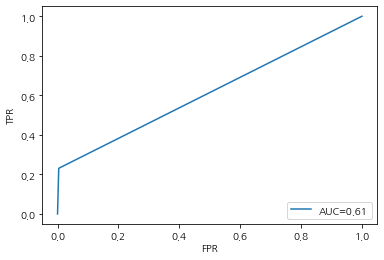

In [17]:
# 207
# 분류 모델 실행 - 의사결정나무
# roc curve 그리기, label에 auc 표시
plt.plot(fpr, tpr, label="AUC=%0.2f"%roc_auc)
plt.legend(loc="lower right")
plt.ylabel("TPR")
plt.xlabel("FPR")
plt.show()

In [18]:
# f1 score
model_f1_score.append(f1_score(df_test_y, y_pred))

In [20]:
# 208
# 분류모델 실행 - 랜덤 포레스트
# 모델 생성
rf_model=RandomForestClassifier(min_samples_leaf=20, max_depth=4, n_estimators=100, random_state=1234)
rf_model.fit(df_train_x, df_train_y)

# train 정확도
train_accuracy.append(rf_model.score(df_train_x, df_train_y))
# test 정확도
test_accuracy.append(rf_model.score(df_test_x, df_test_y))
# 예측값
y_pred=rf_model.predict(df_test_x)

# roc_curve, fpr, tpr
fpr, tpr, thresholds=roc_curve(df_test_y, y_pred)
roc_auc=auc(fpr, tpr)

# auc 저장
model_auc.append(roc_auc)

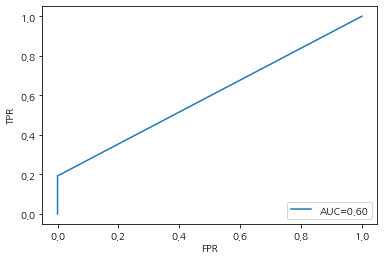

In [21]:
# 209
# 분류 모델 실행 : 랜덤 포레스트
# roc curve 그리기, label에 auc 표시
plt.plot(fpr, tpr, label="AUC=%0.2f"% roc_auc)
plt.legend(loc="lower right")
plt.ylabel("TPR")
plt.xlabel("FPR")
plt.show()

In [22]:
# f1 score
model_f1_score.append(f1_score(df_test_y, y_pred))

In [23]:
# 210
# 분류 모델 실행- 그래디언트 부스팅
# 모델 생성
gb_final=GradientBoostingClassifier(min_samples_leaf=10, max_depth=4, n_estimators=100,
                                   learning_rate=.1, random_state=1234)
gb_final.fit(df_train_x, df_train_y)

# train accuracy
train_accuracy.append(gb_final.score(df_train_x, df_train_y))
# test accuracy
test_accuracy.append(gb_final.score(df_test_x, df_test_y))
# 예측값
y_pred=gb_final.predict(df_test_x)
# roc_curve, fpr, tpr
fpr, tpr, thresholds=roc_curve(df_test_y, y_pred)
roc_auc=auc(fpr, tpr)
# auc 저장
model_auc.append(roc_auc)

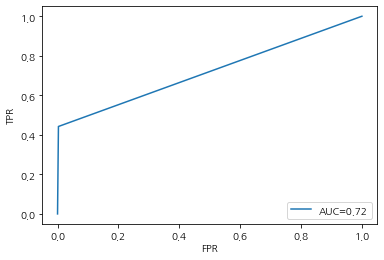

In [24]:
# 211
# 분류 모델 실행: 그래디언트 부스팅
# roc curve 그리기, label에 auc ㅠㅛ시
plt.plot(fpr, tpr, label="AUC=%0.2f"% roc_auc)
plt.legend(loc="lower right")
plt.ylabel("TPR")
plt.xlabel("FPR")
plt.show()
# f1 score
model_f1_score.append(f1_score(df_test_y, y_pred))

In [30]:
# 212
# 분류 모델 실행- 설명변수 scaling
# 변수명 저장
v_feature_names=df_train_x.columns
# standardscaler 적용
scaler=StandardScaler()
df_scaled=scaler.fit_transform(df_raw_x)
df_scaled=pd.DataFrame(df_scaled, columns=v_feature_names)



In [31]:
# 데이터 분할
df_scaled_train_x, df_scaled_test_x=train_test_split(df_scaled, test_size=0.3, random_state=1234)
print("train data X size: {}".format(df_scaled_train_x.shape))
print("train data Y size: {}".format(df_scaled_test_x.shape))

train data X size: (2623, 18)
train data Y size: (1125, 18)


In [33]:
# 213
# 분류 모델 실행-인공 신경망
# 모델 생성
nn_model=MLPClassifier(hidden_layer_sizes=(80,80), activation="relu", solver="adam", random_state=1234)
nn_model.fit(df_scaled_train_x, df_train_y)

# train 정확도
train_accuracy.append(nn_model.score(df_scaled_train_x, df_train_y))
# test 정확도
test_accuracy.append(nn_model.score(df_scaled_test_x, df_test_y))
# 예측값
y_pred=nn_model.predict(df_scaled_test_x)

# roc_curve, fpr, tpr
fpr, tpr, thresholds=roc_curve(df_test_y, y_pred)
roc_auc=auc(fpr, tpr)

# auc 저장
model_auc.append(roc_auc)

/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


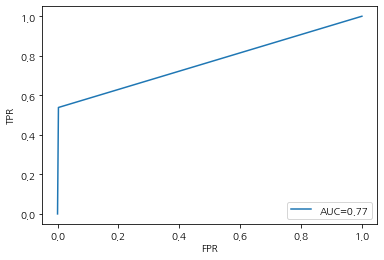

In [34]:
# 214
# 분류모델 실행-인공 신경망
# roc curve 그리기, label에 auc 표시
plt.plot(fpr, tpr, label="AUC=%0.2f"% roc_auc)
plt.legend(loc="lower right")
plt.ylabel("TPR")
plt.xlabel("FPR")
plt.show()

In [35]:
# f1 score
model_f1_score.append(f1_score(df_test_y, y_pred))

In [39]:
# 215
# 모델별 정확도 산출 및 평가-표, 바 플랏 생성
# 모델별 정확도 표
df_eval=pd.DataFrame(index=model)
df_eval["TrainAccuracy"]=train_accuracy
df_eval["TestAccuracy"]=test_accuracy
df_eval["F1Score"]=model_f1_score
df_eval["AUC"]=model_auc
df_eval.round(3)

,TrainAccuracy,TestAccuracy,F1Score,AUC
DecisionTree,0.930,0.925,0.364,0.613
RandomForest,0.927,0.925,0.323,0.596
GradientBoosting,0.977,0.946,0.601,0.720
NeuralNet,1.000,0.955,0.687,0.768


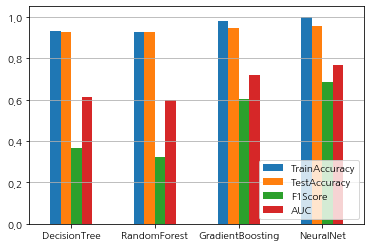

In [40]:
# 정확도 bar plot 생성
df_eval.plot.bar(rot=0)
plt.legend(loc="lower right")
plt.grid(axis="y")